In [1]:
%load_ext tensorboard

In [7]:
import numpy as np
import pandas as pd
import scipy.fft as scft
import scipy.signal as sig
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import json
import seaborn as sns
from sklearn.cluster import KMeans
import os
from tensorflow import keras
from keras.layers import Dense,Dropout, UpSampling1D, Reshape, Conv1D, MaxPooling1D, Input, concatenate, Bidirectional, Add, Activation, GRU
from sklearn import utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
#GPU выключен на случай если нет env под GPU, обучение происходило на google colab


import datetime


SyntaxError: invalid syntax (2652846359.py, line 16)

In [8]:
input_len = 1000

In [9]:
input_len = 1000
input_shape = (input_len, 1)

input_layer = Input(shape=input_shape)
lmd = 0.01

##

conv_block_1_inc_1 = Conv1D(filters=16, kernel_size = 1, activation='relu', padding='same')(input_layer)
pool_inner_1 = MaxPooling1D(pool_size=3, padding = 'same', strides = 1)(input_layer)

conv_block_1_real_1 = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same',dilation_rate = 1)(conv_block_1_inc_1)
conv_block_1_real_2 = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same',dilation_rate = 2)(conv_block_1_inc_1)
conv_block_1_real_3 = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same',dilation_rate = 4)(conv_block_1_inc_1)
conv_block_1_real_4 = Conv1D(filters=16, kernel_size = 1, activation='relu', padding='same')(pool_inner_1)

concat_block_1 = concatenate([conv_block_1_real_1, conv_block_1_real_2, conv_block_1_real_3, conv_block_1_real_4], axis=-1)
conv_block_1_squeezer = Conv1D(filters=8, kernel_size = 1, activation='relu', padding='same')(concat_block_1)

skip_block_1 = Add()([Conv1D(filters=8, kernel_size=1, padding='same')(input_layer), conv_block_1_squeezer])
activate_1 = Activation('relu')(skip_block_1)



pool_1_block_outer = MaxPooling1D(pool_size=2)(activate_1)
##

conv_block_2_inc_1 = Conv1D(filters=32, kernel_size = 1, activation='relu', padding='same')(pool_1_block_outer)
pool_inner_2 = MaxPooling1D(pool_size=3, padding = 'same', strides = 1)(pool_1_block_outer)

conv_block_2_real_1 = Conv1D(filters=24, kernel_size = 3, activation='relu', padding='same',dilation_rate = 1)(conv_block_2_inc_1)
conv_block_2_real_2 = Conv1D(filters=24, kernel_size = 3, activation='relu', padding='same',dilation_rate = 2)(conv_block_2_inc_1)
conv_block_2_real_3 = Conv1D(filters=24, kernel_size = 3, activation='relu', padding='same',dilation_rate = 4)(conv_block_2_inc_1)
conv_block_2_real_4 = Conv1D(filters=24, kernel_size = 1, activation='relu', padding='same')(pool_inner_2)

concat_block_2 = concatenate([conv_block_2_real_1, conv_block_2_real_2, conv_block_2_real_3, conv_block_2_real_4], axis=-1)
conv_block_2_squeezer = Conv1D(filters=24, kernel_size = 1, activation='relu', padding='same')(concat_block_2)

skip_block_2 = Add()([Conv1D(filters=24, kernel_size=1, padding='same')(pool_1_block_outer), conv_block_2_squeezer])
activate_2 = Activation('relu')(skip_block_2)



pool_2_block_outer = MaxPooling1D(pool_size=2)(activate_2)
##

conv_block_3_inc_1 = Conv1D(filters=64, kernel_size = 1, activation='relu', padding='same')(pool_2_block_outer)
pool_inner_3 = MaxPooling1D(pool_size=3, padding = 'same', strides = 1)(pool_2_block_outer)

conv_block_3_real_1 = Conv1D(filters=32, kernel_size = 3, activation='relu', padding='same',dilation_rate = 1)(conv_block_3_inc_1)
conv_block_3_real_2 = Conv1D(filters=32, kernel_size = 3, activation='relu', padding='same',dilation_rate = 2)(conv_block_3_inc_1)
conv_block_3_real_3 = Conv1D(filters=32, kernel_size = 3, activation='relu', padding='same',dilation_rate = 4)(conv_block_3_inc_1)
conv_block_3_real_4 = Conv1D(filters=32, kernel_size = 1, activation='relu', padding='same')(pool_inner_3)

concat_block_3 = concatenate([conv_block_3_real_1, conv_block_3_real_2, conv_block_3_real_3, conv_block_3_real_4], axis=-1)
conv_block_3_squeezer = Conv1D(filters=32, kernel_size = 1, activation='relu', padding='same')(concat_block_3)

lstm_block_3 = Bidirectional(GRU(32, return_sequences = True))(conv_block_3_squeezer)
skip_block_3 = Add()([Conv1D(filters=32*2, kernel_size=1, padding='same', activation = 'tanh')(pool_2_block_outer), lstm_block_3])
activate_3 = Activation('relu')(skip_block_3)


upsample_1 = UpSampling1D(size=2)(activate_3)
##
concat_2_4 = concatenate([upsample_1, activate_2], axis=-1)
conv_block_4_inc_1 = Conv1D(filters=16, kernel_size = 1, activation='relu', padding='same')(concat_2_4)
pool_inner_4 = MaxPooling1D(pool_size=3, padding = 'same', strides = 1)(concat_2_4)

conv_block_4_real_1 = Conv1D(filters=24, kernel_size = 3, activation='relu', padding='same',dilation_rate = 4)(conv_block_4_inc_1)
conv_block_4_real_2 = Conv1D(filters=24, kernel_size = 3, activation='relu', padding='same',dilation_rate = 2)(conv_block_4_inc_1)
conv_block_4_real_3 = Conv1D(filters=24, kernel_size = 3, activation='relu', padding='same',dilation_rate = 1)(conv_block_4_inc_1)
conv_block_4_real_4 = Conv1D(filters=24, kernel_size = 1, activation='relu', padding='same')(pool_inner_4)

concat_block_4 = concatenate([conv_block_4_real_1, conv_block_4_real_2, conv_block_4_real_3, conv_block_4_real_4], axis=-1)
conv_block_4_squeezer = Conv1D(filters=12, kernel_size = 3, activation='relu', padding='same')(concat_block_4)

lstm_block_4 = Bidirectional(GRU(16, return_sequences = True))(conv_block_4_squeezer)
skip_block_4 = Add()([Conv1D(filters=32, kernel_size=1, padding='same', activation = 'tanh')(upsample_1), lstm_block_4])
activate_4 = Activation('relu')(skip_block_4)

upsample_2 = UpSampling1D(size=2)(activate_4)

##
concat_1_5 = concatenate([upsample_2, activate_1], axis=-1)
conv_block_5_inc_1 = Conv1D(filters=8, kernel_size = 1, activation='relu', padding='same')(concat_1_5)
pool_inner_5 = MaxPooling1D(pool_size=3, padding = 'same', strides = 1)(concat_1_5)

conv_block_5_real_1 = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same',dilation_rate = 4)(conv_block_5_inc_1)
conv_block_5_real_2 = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same',dilation_rate = 2)(conv_block_5_inc_1)
conv_block_5_real_3 = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same',dilation_rate = 1)(conv_block_5_inc_1)
conv_block_5_real_4 = Conv1D(filters=16, kernel_size = 1, activation='relu', padding='same')(pool_inner_5)

concat_block_5 = concatenate([conv_block_5_real_1, conv_block_5_real_2, conv_block_5_real_3, conv_block_5_real_4], axis=-1)
conv_block_5_squeezer = Conv1D(filters=16, kernel_size = 3, activation='relu', padding='same')(concat_block_5)

lstm_block_5 = Bidirectional(GRU(32, return_sequences = True))(conv_block_5_squeezer)
skip_block_5 = Add()([Conv1D(filters=64, kernel_size=1, padding='same')(upsample_2), lstm_block_5])
activate_5 = Activation('relu')(skip_block_5)


output_layer = Conv1D(3, kernel_size = 3, activation = 'softmax', padding = 'same')(activate_5)


model_4_dilation = keras.Model(inputs=input_layer, outputs=output_layer)

print(model_4_dilation.summary())

model_4_dilation.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.0003),
             loss='categorical_crossentropy',
             metrics=[keras.metrics.CategoricalCrossentropy(), 'acc'])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1000, 1)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1000, 16)             32        ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 1000, 1)              0         ['input_1[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 1000, 16)             784       ['conv1d[0][0]']          

 conv1d_19 (Conv1D)          (None, 250, 32)              4128      ['concatenate_2[0][0]']       
                                                                                                  
 conv1d_20 (Conv1D)          (None, 250, 64)              1600      ['max_pooling1d_3[0][0]']     
                                                                                                  
 bidirectional (Bidirection  (None, 250, 64)              12672     ['conv1d_19[0][0]']           
 al)                                                                                              
                                                                                                  
 add_2 (Add)                 (None, 250, 64)              0         ['conv1d_20[0][0]',           
                                                                     'bidirectional[0][0]']       
                                                                                                  
 activatio

                                                                                                  
 conv1d_35 (Conv1D)          (None, 1000, 3)              579       ['activation_4[0][0]']        
                                                                                                  
Total params: 85391 (333.56 KB)
Trainable params: 85391 (333.56 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________
None


In [11]:
X_train, X_test, y_train, y_test, X_train_shuf, y_train_shuf, y_train_arr, y_test_eval,X_train_arr = 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
X_train = pd.read_csv('DatasetForPetroCNN/X_train.csv')
X_test = pd.read_csv('DatasetForPetroCNN/X_test.csv')
y_train = pd.read_csv('DatasetForPetroCNN/y_train.csv')
y_test = pd.read_csv('DatasetForPetroCNN/y_test.csv')

X_train_shuf, y_train_shuf = shuffle(X_train, y_train, random_state = 7)

X_train_shuf = X_train_shuf.drop(["Unnamed: 0", "curvename"], axis = 1)
y_train_shuf = y_train_shuf.drop(["Unnamed: 0", "curvename"], axis = 1)

X_train_arr, y_train_arr = np.array(X_train_shuf), np.array(y_train_shuf)

X_train_arr = np.expand_dims(X_train_arr, axis = 2)


test_names = X_test["curvename"]
depadder = pd.read_csv('DatasetForPetroCNN/depadder.csv')
depadder = depadder.drop(['Unnamed: 0'], axis = 1)

X_test_eval = X_test.drop(["Unnamed: 0", "curvename"], axis = 1)
y_test_eval = y_test.drop(["Unnamed: 0", "curvename"], axis = 1)

X_test_eval, y_test_eval = np.array(X_test_eval), np.array(y_test_eval)

X_test_eval = np.expand_dims(X_test_eval, axis = 2)



y_train_arr = keras.utils.to_categorical(y_train_arr)
y_test_eval = keras.utils.to_categorical(y_test_eval)

In [13]:
X_train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,curvename
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0_il_mod
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1_il_mod
2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2_il_mod
3,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3_il_mod
4,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5_il_mod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,1.030648,0.967747,0.952316,1.026426,0.992450,1.038965,0.960314,0.969509,1.002609,...,1.002836,0.976298,1.054035,1.020903,0.945419,1.023204,1.026406,1.017635,0.972459,36_p
256,256,1.066912,0.973079,1.074916,0.945321,0.989852,1.111429,1.033926,0.965695,1.116696,...,0.989637,0.970859,1.025445,0.983253,1.079611,0.940009,0.992152,0.968628,1.085717,36_p
257,257,1.076870,0.955289,0.912146,0.981140,1.093306,0.969633,1.090648,1.050461,0.973851,...,0.945818,1.001298,0.992026,1.042029,0.988266,0.934002,1.030248,0.959041,0.883450,37_p
258,258,0.953088,1.047453,0.945719,0.949708,0.973076,1.000000,1.049522,1.054784,1.007234,...,1.032245,1.028729,1.042835,0.964587,1.002649,0.986056,0.958316,1.050781,1.018299,37_p


In [14]:
X_train_arr.shape

(260, 1000, 1)

In [15]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [16]:
model_4_dilation.fit(X_train_arr, y_train_arr, epochs = 45, batch_size = 15, validation_split= 0.2, callbacks = [tensorboard_callback])


Epoch 1/45
14/14 [==============================] - 23s 675ms/step - loss: 0.7701 - categorical_crossentropy: 0.7701 - acc: 0.7352 - val_loss: 0.6797 - val_categorical_crossentropy: 0.6797 - val_acc: 0.7702
Epoch 2/45
14/14 [==============================] - 7s 521ms/step - loss: 0.7151 - categorical_crossentropy: 0.7151 - acc: 0.7352 - val_loss: 0.6488 - val_categorical_crossentropy: 0.6488 - val_acc: 0.7702
Epoch 3/45
14/14 [==============================] - 8s 540ms/step - loss: 0.6752 - categorical_crossentropy: 0.6752 - acc: 0.7352 - val_loss: 0.6176 - val_categorical_crossentropy: 0.6176 - val_acc: 0.7702
Epoch 4/45
14/14 [==============================] - 7s 516ms/step - loss: 0.6347 - categorical_crossentropy: 0.6347 - acc: 0.7351 - val_loss: 0.5739 - val_categorical_crossentropy: 0.5739 - val_acc: 0.7701
Epoch 5/45
14/14 [==============================] - 8s 580ms/step - loss: 0.5843 - categorical_crossentropy: 0.5843 - acc: 0.7354 - val_loss: 0.5245 - val_categorical_crossent

Epoch 41/45
14/14 [==============================] - 7s 514ms/step - loss: 0.2253 - categorical_crossentropy: 0.2253 - acc: 0.9118 - val_loss: 0.2230 - val_categorical_crossentropy: 0.2230 - val_acc: 0.9081
Epoch 42/45
14/14 [==============================] - 7s 514ms/step - loss: 0.2247 - categorical_crossentropy: 0.2247 - acc: 0.9110 - val_loss: 0.2184 - val_categorical_crossentropy: 0.2183 - val_acc: 0.9112
Epoch 43/45
14/14 [==============================] - 7s 516ms/step - loss: 0.2425 - categorical_crossentropy: 0.2425 - acc: 0.9018 - val_loss: 0.2259 - val_categorical_crossentropy: 0.2259 - val_acc: 0.9084
Epoch 44/45
14/14 [==============================] - 7s 519ms/step - loss: 0.2219 - categorical_crossentropy: 0.2219 - acc: 0.9113 - val_loss: 0.2151 - val_categorical_crossentropy: 0.2151 - val_acc: 0.9125
Epoch 45/45
14/14 [==============================] - 7s 528ms/step - loss: 0.2056 - categorical_crossentropy: 0.2056 - acc: 0.9180 - val_loss: 0.2091 - val_categorical_cros

In [17]:
model_4_dilation.evaluate(X_test_eval, y_test_eval)

1/1 [==============================] - 0s 141ms/step - loss: 0.2379 - categorical_crossentropy: 0.2379 - acc: 0.9130


[0.2378910481929779, 0.2378910481929779, 0.9129999876022339]

In [18]:
%tensorboard --logdir logs/fit

In [ ]:
rm -rf ./logs/

In [19]:
def tresholder(mask, threshold):
  res = np.zeros_like(mask)
  res[mask > threshold] = 1
  return res

def naive_postprocesseor(mask_dataset_input):
  out = np.zeros_like(mask_dataset_input)

  for i in range (mask_dataset_input.shape[0]):
    everything = mask_dataset_input[i, :]
    channels = (mask_dataset_input[i, :] == 1)
    barres = (mask_dataset_input[i, :] == 2)

    anomalies = np.zeros_like(mask_dataset_input[i,:])
    anomalies[(channels + barres)  != False] = 1

    edges_anomalies = np.diff(anomalies, 1)
    left_edges = np.nonzero(edges_anomalies == 1)[0]
    right_edges = np.nonzero(edges_anomalies == -1)[0]
    for j in range(len(left_edges)):
      window = everything[left_edges[j] : right_edges[j]]
      channelcount = np.sum(window == 1)
      barrecount = np.sum(window == 2)


      if channelcount >= barrecount:
        everything[left_edges[j] : right_edges[j]] = 1
      else:
        everything[left_edges[j] : right_edges[j]] = 2

    out[i,:] = everything
  return out




In [20]:
predictions = model_4_dilation.predict(X_test_eval)
X_draw = X_test_eval.squeeze()
predictions = predictions.squeeze()
reality = y_test_eval.squeeze()

1/1 [==============================] - 2s 2s/step


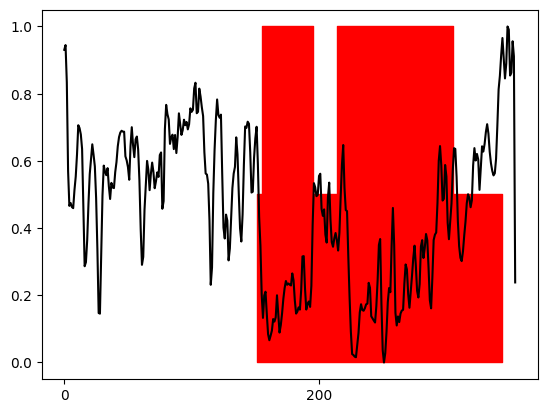

In [21]:
if reality.shape[-1] == 3:
  reality = np.argmax(reality, axis = -1)
  predictions = np.argmax(predictions, axis = -1)

curve_ind = 6
pred_postprocessed = predictions
pred_postprocessed = naive_postprocesseor(pred_postprocessed)

draw_curve = X_draw[curve_ind]
real_mask = reality[curve_ind]
pred_mask = pred_postprocessed[curve_ind]


real_mask = real_mask[np.diff(draw_curve, 1, prepend = (1)) != 0]
pred_mask = pred_mask[np.diff(draw_curve, 1, prepend = (1)) != 0]
draw_curve = draw_curve[np.diff(draw_curve, 1, prepend = (1)) != 0]
draw_curve = draw_curve.max() - draw_curve
draw_curve = (draw_curve - draw_curve.min())/(draw_curve.max()- draw_curve.min())


plt.plot()

plt.xticks(range(0,input_len,200))

plt.fill_between(range(len(draw_curve)), 0.5, draw_curve.max(), where = pred_mask == 1 ,color = "red")
plt.fill_between(range(len(draw_curve)), 0.5, draw_curve.min(), where = real_mask == 1 ,color = "red")
plt.fill_between(range(len(draw_curve)), 0.5, draw_curve.max(), where = pred_mask == 2 ,color = "blue")
plt.fill_between(range(len(draw_curve)), 0.5, draw_curve.min(), where = real_mask == 2 ,color = "blue")
plt.plot(draw_curve, 'k-')

In [23]:
Output = pd.read_csv('DatasetForPetroCNN/curves.csv')
Output = Output.drop(["Unnamed: 0"], axis = 1)
Output_arr = np.array(Output.drop(["curvename"], axis = 1))
prediction_masks = model_4_dilation.predict(np.expand_dims(Output_arr, axis = 2))
prediction_masks = np.argmax(prediction_masks, axis = -1)
prediction_masks = pd.DataFrame(prediction_masks.squeeze())
prediction_masks["curvename"] = Output["curvename"]
prediction_masks.to_csv('DatasetForPetroCNN/Output.csv')

3/3 [==============================] - 0s 120ms/step


In [25]:
model_4_dilation.save('model_4_dil.json')
model_4_dilation.save_weights('model_4_dil_w8s.h5')

INFO:tensorflow:Assets written to: model_4_dil.json\assets


INFO:tensorflow:Assets written to: model_4_dil.json\assets


In [ ]:
model = keras.models.load_model('model_4_dil.json')
model.load_weights('model_4_dil_w8s.h5')